In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
# Any results you write to the current directory are saved as output.
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

/kaggle/input/heart-disease/heart.csv
heart-disease



In [2]:
data = pd.read_csv("../input/heart-disease/heart.csv")
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data_x = data.drop(["target"],axis = 1)
data_x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
data_y = data.loc[:,["target"]]
data_y.head()
# if the target  Y / N instead of 1 and 0 we should use data.diagnosis = [1 if each == "Y" else 0 for each in data.diagnosis]


,target
0,1
1,1
2,1
3,1
4,1


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y , test_size=0.15, random_state=42)


**LOGİSTİC REGRESSİON**

In [6]:
from sklearn import linear_model
logreg= linear_model.LogisticRegression(random_state = 42,max_iter= 50)
print("test accuracy: {} ".format(logreg.fit(X_train, Y_train).score(X_test, Y_test)))

test accuracy: 0.8478260869565217 


**KNN**

60 nn score  : 0.8260869565217391 


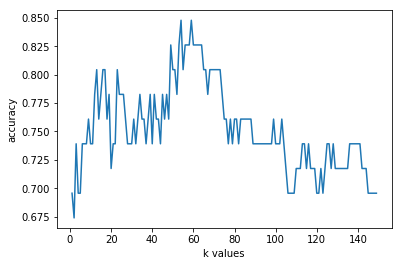

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 60)
knn.fit(X_train,Y_train)
prediction = knn.predict(X_test)
print("{} nn score  : {} ".format(60,knn.score(X_test,Y_test)))
score_list = [] 
for each in range(1,150):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,Y_train)
    score_list.append(knn2.score(X_test,Y_test))

  
plt.plot(range(1,150),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

**SUPPORT VECTOR MACHİNE**

In [8]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
print("test accuracy: {} ".format(svm.fit(X_train, Y_train).score(X_test, Y_test)))

test accuracy: 0.6086956521739131 


NAİVE BAYAS

In [9]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train,Y_train)
print("test accuracy: {} ".format(naive.fit(X_train, Y_train).score(X_test, Y_test)))

test accuracy: 0.8043478260869565 


**DESİCİON TREES**

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
print("test accuracy: {} ".format(dt.score(X_test, Y_test)))

test accuracy: 0.8260869565217391 


**RANDOM FOREST**

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000 , random_state = 1)
rf.fit(X_train,Y_train)
print("test accuracy: {} ".format(rf.score(X_test, Y_test)))

test accuracy: 0.8478260869565217 


**Evaluation with confusion matrix
**

In [12]:
y_true = Y_test
y_head = rf.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_head)
print(cm)

[[14  4]
 [ 3 25]]


**Visualazition confusion matrix**

Text(42.0, 0.5, 'y_true')

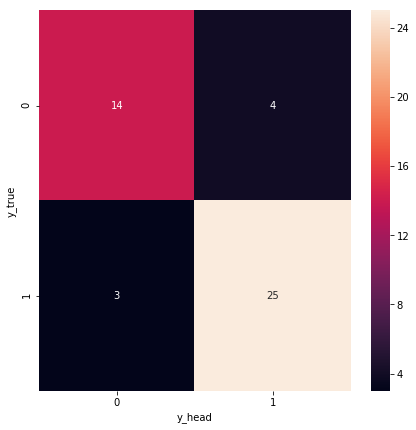

In [13]:
import seaborn as sns
plt.figure(figsize = (7,7))
sns.heatmap(cm,annot = True)
plt.xlabel("y_head")
plt.ylabel("y_true")